<a href="https://colab.research.google.com/github/lafa-code/MachineLearning/blob/main/Zscores_Outliers_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" Kita mendapatkan akses ke google drive (dataset kita)"""
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Reading the dataset ke dataframe
import pandas as pd #Library untuk membaca dan memproses dataframe

#Select the file path
file_path='/content/drive/MyDrive/01-DATASET_FINAL/coba_out.xlsx'



# Membaca file excel ke dataframe df
# df= variabel yang digunakan untuk menyimpan data yang dibaca dari file Excel dan disimpan ke dalam sebuah DataFrame di Pandas
df=pd.read_excel(file_path)


In [ ]:
# fungsi di Pandas yang digunakan untuk melihat beberapa baris pertama dari DataFrame df
df.head(6)

,Nama,Matematika,Bahasa,Fisika,Jenis Kelamin
0,joko,85,80,78,Laki-laki
1,Dina,77,78,79,Perempuan
2,Mira,83,85,74,Perempuan
3,Ana,5,5,2,Perempuan
4,Mipan,80,87,82,Laki-laki
5,Sandi,79,80,80,Laki-laki


In [ ]:
#Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns


""" Outliers Handling """
#library
import numpy as np
from scipy import stats

# digunakan untuk memilih kolom numerik dari DataFrame df
non_categorical_columns = df.select_dtypes(include=[np.number]).columns


In [ ]:
non_categorical_columns


Index(['Matematika', 'Bahasa', 'Fisika'], dtype='object')

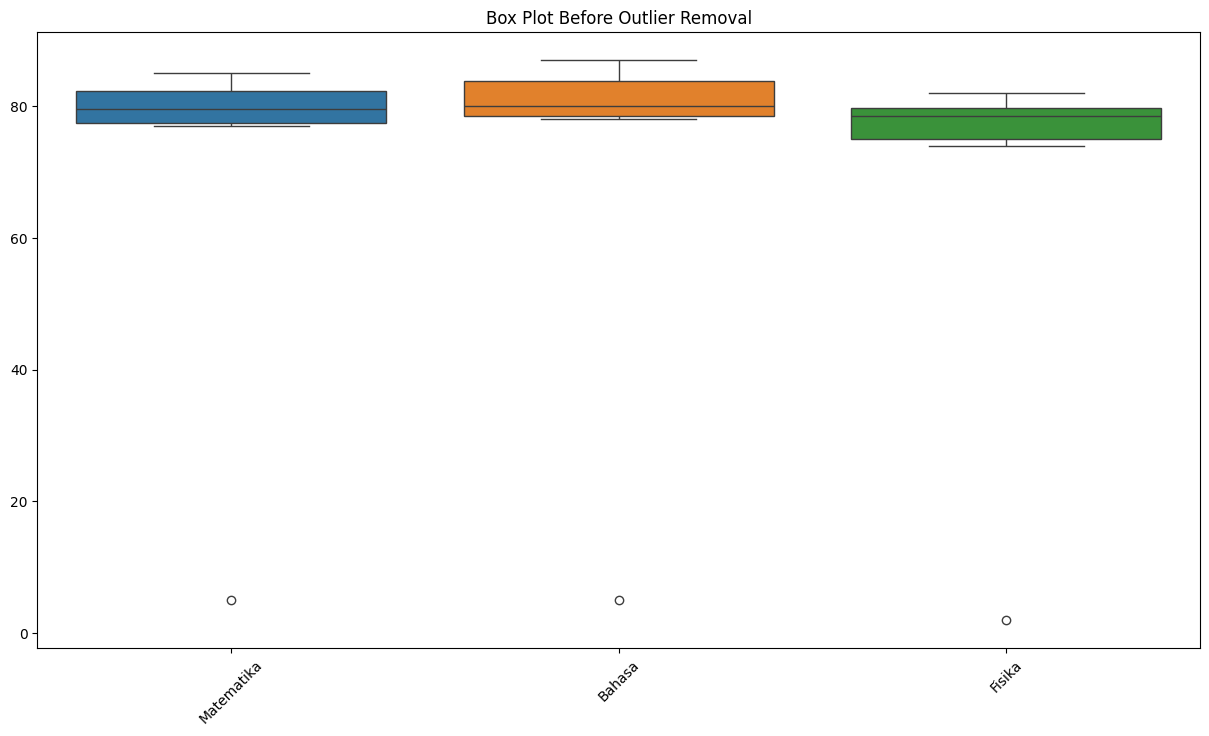

In [ ]:
# Membuat box plot sebelum penghapusan outlier
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[non_categorical_columns])
plt.title('Box Plot Before Outlier Removal')
plt.xticks(rotation=45)

# Metode 1: Metode z-scores
# Z score untuk mengidentifikasi dan menghilangkan outlier yang berjarak lebih dari 3 standar deviasi dari rata-rata--> ekstrem, 2-->moderate outlier
df_removed=df[(np.abs(stats.zscore(df[non_categorical_columns]))<2).all(axis=1)]


#Menyimpan menjadi data baru setelah penghapusan
df_removed.to_csv('data_removed.csv', index=False)

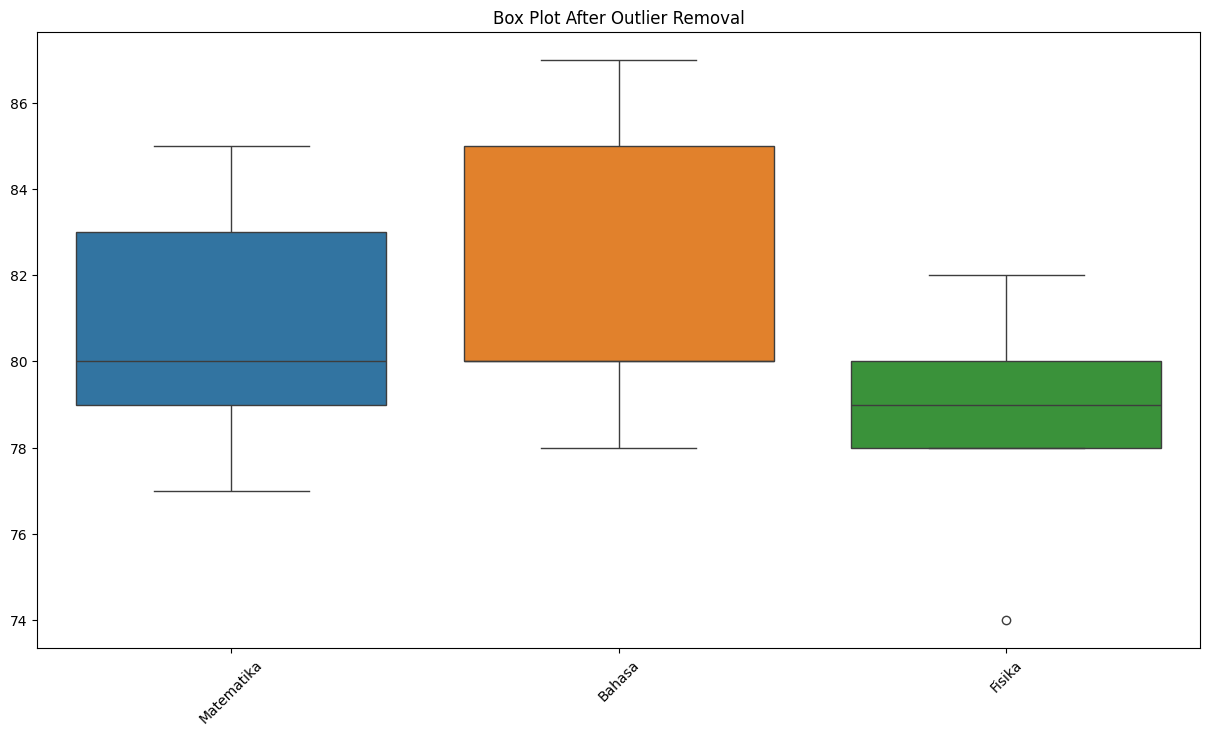

In [ ]:
# Plotting box plots after outlier removal
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_removed[non_categorical_columns])
plt.title('Box Plot After Outlier Removal')
plt.xticks(rotation=45)
plt.show()
